## 如何计算模型的准确性


### 我们把之前的代码重复一次

* 同学我写本书是没有稿费的， 为什么重复？
* 是因为我想一章基本只讲一重点，大家容易理解
* 知识是需要重复记忆的，读重复的代码，加深大家的理解
* 主要是想让大家熟练 fcst_df 的生成与可视化

* 读取澳航数据

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

# url = "../data/AirPassengers.csv" 如果把这个仓库下载后可以使用这个地址
# 如果后面有发现文件读不出来，可以自己手工把 .. 换成 https://raw.githubusercontent.com/liuhui998/time-series-little-book/master
# 但是这需要挂了 VPN, 因为课件还在开发过程中，大家多包涵
url = "../data/AirPassengers.csv"
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month',date_parser=dateparse)
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


* 将数据分成训练集和测试集
* 并生成预测用的 fcst_df

In [3]:
# 因为周期为 12个月，test_num 就为12
test_num = 12 
train = data.iloc[0:-test_num,:]
print(train.shape)
test = data.iloc[-test_num:,:]
fcst_df = pd.DataFrame({
    'train': train['Passengers'],
    'test' : test['Passengers']
})
fcst_df.describe()

(132, 1)


,train,test
count,132.000000,12.000000
mean,262.492424,476.166667
std,106.625799,77.737125
min,104.000000,390.000000
25%,176.500000,418.500000
50%,239.500000,461.000000
75%,343.250000,514.750000
max,559.000000,622.000000


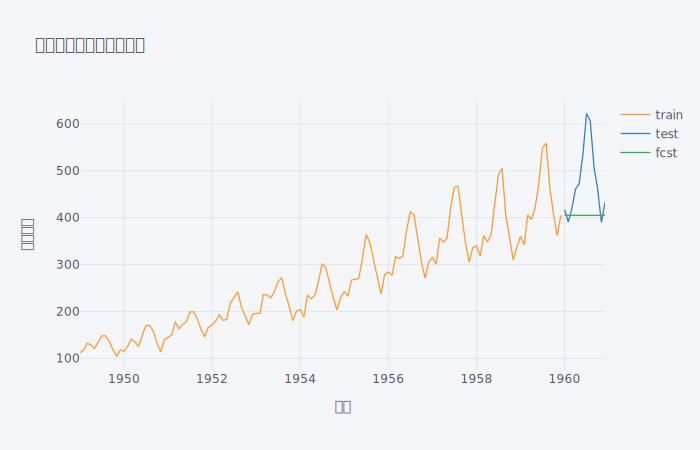

In [4]:
import cufflinks as cf

last_value = train.iloc[-1,:]['Passengers']
fcst_series = pd.Series(last_value,index = test.index)
fcst_df['fcst'] = fcst_series
new_fcst_fig = fcst_df.iplot(asFigure = True, xTitle="时间",yTitle="乘客数量", title="预测最近一年航空乘客数")
new_fcst_fig.show('svg')

### 最常用的算法

*RMSE*

* Root Mean Square Error,均方根误差
* 是真测值与预测值偏差的平方和与预测数m比值的平方根。
* 是用来衡量观测值同真值之间的偏差

![](../images/rmse.jpg)

* 如果上面的公式看不懂，我用 Python 算一次就可以明白了
* 先算出真值（测试与预测值的差值
* 再对每个差值求平方后再相加求和
* 再除以预测数, 最后再开平方就可以了

In [22]:
import numpy as np

diff = (fcst_df['test'] - fcst_df['fcst'])
square_diff_sum = np.sum(np.square(diff))
square_diff_one = square_diff_sum/test.shape[0]
rmse = np.sqrt(square_diff_one)
rmse

102.97653454387881

* 如果觉得上面的代码太麻烦了，可以使用 sklearn 里自带的 mean_squared_error

In [46]:
from sklearn.metrics import mean_squared_error
sk_rmse = np.sqrt(mean_squared_error(fcst_df.iloc[-test_num:,]['test'].values, 
                                 fcst_df.iloc[-test_num:,]['fcst'].values))
sk_rmse


102.97653454387881
